In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Load Data

In [3]:
df = pd.read_csv('data/HousePrice.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


### Don't want all the data

In [4]:
df = df[["bedrooms", "bathrooms", "floors", "price"]]
df = df.dropna()
df.head()

,bedrooms,bathrooms,floors,price
0,3.0,1.50,1.5,313000.0
1,5.0,2.50,2.0,2384000.0
2,3.0,2.00,1.0,342000.0
3,3.0,2.25,1.0,420000.0
4,4.0,2.50,1.0,550000.0


# 1. Price vs Bedrooms

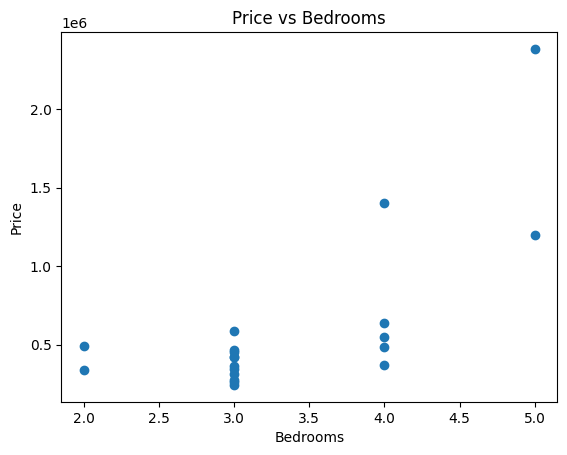

In [5]:
plt.scatter(df['bedrooms'].iloc[:20], df['price'].iloc[:20])
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.title('Price vs Bedrooms')
plt.show()

In [6]:
x = np.array(df[['bedrooms']])
y = np.array(df[['price']])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [7]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3680, 1), (920, 1), (3680, 1), (920, 1))

In [8]:
model = LinearRegression()

In [9]:
model.fit(x_train, y_train)

LinearRegression()

In [12]:
mean_squared_error(y_test, model.predict(x_test))

111713618289.81282

c:\Users\kimig\OneDrive - The George Washington University\ML\myenv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


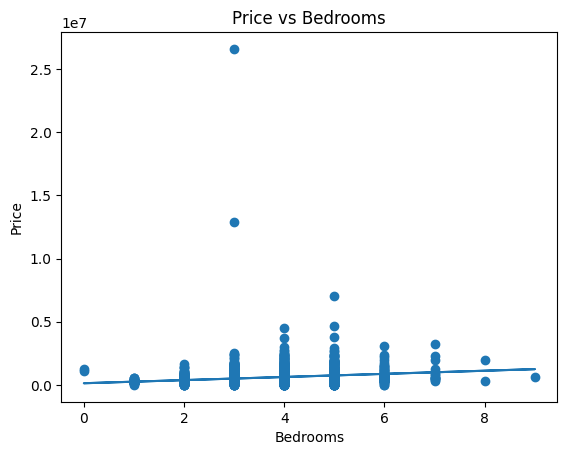

In [13]:
plt.scatter(df['bedrooms'], df['price'])
plt.plot(df['bedrooms'], model.predict(df[['bedrooms']]))
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.title('Price vs Bedrooms')
plt.show()

# Multiple Linear Regression

In [15]:
model2 = LinearRegression()

In [16]:
x1 = np.array(df[['bedrooms', 'bathrooms', 'floors']])
y1 = np.array(df[['price']])

x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.2)

In [17]:
model2.fit(x_train1, y_train1)

LinearRegression()

c:\Users\kimig\OneDrive - The George Washington University\ML\myenv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


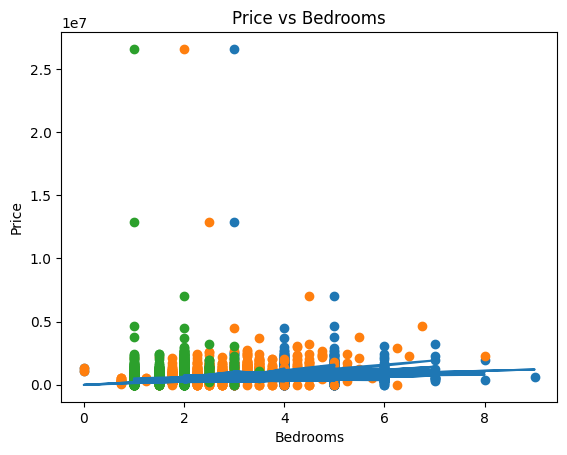

In [18]:
plt.scatter(df['bedrooms'], df['price'])
plt.scatter(df['bathrooms'], df['price'])
plt.scatter(df['floors'], df['price'])
plt.plot(df['bedrooms'], model2.predict(df[['bedrooms', 'bathrooms', 'floors']]))
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.title('Price vs Bedrooms')
plt.show()

# Polynomial Regression